#Week 2 Assignment



---



---

by imjjun(Kubig 16th)


You would implement five algorithms which are
- Distance

- Linear Classifier

- SVM loss

- Softmax loss

- SGD(Stochastic Gradient Descent) !

Import Numpy

In [36]:
import numpy as np
#Only numpy would be used in this notebook

torch for using the CIFAR10 Datset

**You must not use the torch for implementing the functions**

In [37]:
from keras.datasets import cifar10

(X_train, y_train) , (X_test, y_test) = cifar10.load_data()
X_train=X_train/255.0; X_test=X_test/255.0

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 200

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

dataiter = iter(trainloader)
images, labels = next(dataiter)
testiter=iter(testloader)
test_images, test_labels=next(testiter)

Files already downloaded and verified
Files already downloaded and verified


##Distance

We would implement the 'computation of **L2 distance** with one/two loops'

In [ ]:
def compute_distances_two_loops(X_train,X):
        """
        Compute the distance between each test point in X and each training point
        in self.X_train using a nested loop over both the training data and the
        test data.

        Inputs:
        - X: A numpy array of shape (num_test, D) containing test data.

        Returns:
        - dists: A numpy array of shape (num_test, num_train) where dists[i, j]
          is the Euclidean distance between the ith test point and the jth training
          point.
        """
        num_test = X.shape[0]
        num_train = X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        for i in range(num_test):
            for j in range(num_train):
                #####################################################################
                # TODO:                                                             #
                # Compute the l2 distance between the ith test point and the jth    #
                # training point, and store the result in dists[i, j]. You should   #
                # not use a loop over dimension, nor use np.linalg.norm().          #
                #####################################################################
                # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****



                # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return dists

In [ ]:
def compute_distances_one_loop(X_train, X):
        """
        Compute the distance between each test point in X and each training point
        in self.X_train using a single loop over the test data.

        Input / Output: Same as compute_distances_two_loops
        """
        num_test = X.shape[0]
        num_train = X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        for i in range(num_test):
            #######################################################################
            # TODO:                                                               #
            # Compute the l2 distance between the ith test point and all training #
            # points, and store the result in dists[i, :].                        #
            # Do not use np.linalg.norm().                                        #
            #######################################################################
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****



            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return dists

In [ ]:
images=images
test_images=test_images

dists_one = compute_distances_one_loop(images.numpy(),test_images.numpy())

#Check whether the two implementations are correct :)
#If you implement the two things correctly, the difference must be smaller than 0.001 !

difference = np.linalg.norm(compute_distances_two_loops(images.numpy(), test_images.numpy()) - dists_one, ord='fro')
print('One loop difference was: %f' % (difference, ))
if difference < 0.001:
    print('Good! The distance matrices are the same')
else:
    print('Uh-oh! The distance matrices are different')

One loop difference was: 0.000000
Good! The distance matrices are the same


##Linear Classifier

In [49]:
class LinearClassifier(object):
    def __init__(self):
        self.W = None

    def train(
        self,
        X,
        y,
        learning_rate=1e-3,
        reg=1e-5,
        num_iters=100,
        batch_size=200,
        verbose=False,
    ):
        """
        Train this linear classifier using stochastic gradient descent.

        Inputs:
        - X: A numpy array of shape (N, D) containing training data; there are N
          training samples each of dimension D.
        - y: A numpy array of shape (N,) containing training labels; y[i] = c
          means that X[i] has label 0 <= c < C for C classes.
        - learning_rate: (float) learning rate for optimization.
        - reg: (float) regularization strength.
        - num_iters: (integer) number of steps to take when optimizing
        - batch_size: (integer) number of training examples to use at each step.
        - verbose: (boolean) If true, print progress during optimization.

        Outputs:
        A list containing the value of the loss function at each training iteration.
        """
        X=X.reshape(X.shape[0],-1)
        y=y.squeeze(1)
        num_train, dim = X.shape
        num_classes = (
            np.max(y) + 1
        )  # assume y takes values 0...K-1 where K is number of classes

        if self.W is None:
            # lazily initialize W
            self.W = 0.001 * np.random.randn(dim, num_classes)

        # Run stochastic gradient descent to optimize W
        loss_history = []
        for it in range(num_iters):
            X_batch = None
            y_batch = None

            #########################################################################
            # TODO:                                                                 #
            # Sample batch_size elements from the training data and their           #
            # corresponding labels to use in this round of gradient descent.        #
            # Store the data in X_batch and their corresponding labels in           #
            # y_batch; after sampling X_batch should have shape (batch_size, dim)   #
            # and y_batch should have shape (batch_size,)                           #
            #                                                                       #
            # Hint: Use np.random.choice to generate indices. Sampling with         #
            # replacement is faster than sampling without replacement.              #
            # Also, using the np.arange() would make a good array for indicing      #
            #########################################################################
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****



            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

            # evaluate loss and gradient
            loss, grad = self.loss(X_batch, y_batch, reg)
            loss_history.append(loss)

            # perform parameter update
            #########################################################################
            # TODO:                                                                 #
            # Update the weights using the gradient and the learning rate.          #
            # You should update the negative value !!                               #
            #########################################################################
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****



            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

            if verbose and it % 100 == 0:
                print("iteration %d / %d: loss %f" % (it, num_iters, loss))

        return loss_history

    def predict(self, X):
        """
        Use the trained weights of this linear classifier to predict labels for
        data points.

        Inputs:
        - X: A numpy array of shape (N, D) containing training data; there are N
          training samples each of dimension D.

        Returns:
        - y_pred: Predicted labels for the data in X. y_pred is a 1-dimensional
          array of length N, and each element is an integer giving the predicted
          class.
        """
        y_pred = np.zeros(X.shape[0])
        X=X.reshape(X.shape[0],-1)

        ###########################################################################
        # TODO:                                                                   #
        # Implement this method. Store the predicted labels in y_pred.            #
        # Hint: Use the Function -> np.argmax                                     #
        ###########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****







        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return y_pred

    def loss(self, X_batch, y_batch, reg):
        """
        Compute the loss function and its derivative.
        Subclasses will override this.

        Inputs:
        - X_batch: A numpy array of shape (N, D) containing a minibatch of N
          data points; each point has dimension D.
        - y_batch: A numpy array of shape (N,) containing labels for the minibatch.
        - reg: (float) regularization strength.

        Returns: A tuple containing:
        - loss as a single float
        - gradient with respect to self.W; an array of the same shape as W
        """
        pass


class LinearSVM(LinearClassifier):
    """ A subclass that uses the Multiclass SVM loss function """

    def loss(self, X_batch, y_batch, reg):
        return svm_loss_naive(self.W, X_batch, y_batch, reg) #If you want to verify the svm_loss_vectorized, then replace naive loss with vectorized loss


class Softmax(LinearClassifier):
    """ A subclass that uses the Softmax + Cross-entropy loss function """

    def loss(self, X_batch, y_batch, reg):
        return softmax_loss_naive(self.W, X_batch, y_batch, reg)

Your implementation would be checked after implementing the loss function, since Network must have 'loss function' to optimize itself!

##SVM Loss

Assume that this SVM Loss was calculated after we take the Linear classfier such that it calculated the form as 'Wx+b'

(Then now we can track the gradient of input)


we see the SVM Loss in lecture note such that

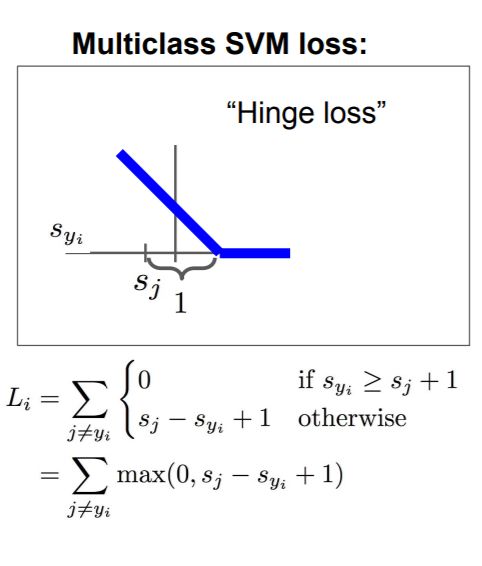

Then, let's put into use :)



###Naive SVM Loss

Implement the naive SVM Loss by only using numpy with considering two ideas:

1) What is the gradient of 'max function'?

2) How can we approach the appropriate index of input array?

(Hint: Think about the original function 'Wx+b' & Chain Rule)

In [41]:
def svm_loss_naive(W, X, y, reg):
    """
    Structured SVM loss function, naive implementation (with loops).

    Inputs have dimension D, there are C classes, and we operate on minibatches
    of N examples.

    Inputs:
    - W: A numpy array of shape (D, C) containing weights.
    - X: A numpy array of shape (N, D) containing a minibatch of data.
    - y: A numpy array of shape (N,) containing training labels; y[i] = c means
      that X[i] has label c, where 0 <= c < C.
    - reg: (float) regularization strength

    Returns a tuple of:
    - loss as single float
    - gradient with respect to weights W; an array of same shape as W
    """
    dW = np.zeros(W.shape)  # initialize the gradient as zero


    # compute the loss and the gradient
    num_classes = W.shape[1]
    num_train = X.shape[0]
    loss = 0.0
    for i in range(num_train):
        scores = X[i].dot(W)
        correct_class_score = scores[y[i]]
        for j in range(num_classes):

    #############################################################################
    # TODO:                                                                     #
    # Compute the loss of SVM and add up on the variable 'loss'                 #
    # Also you should add up the 'derivatives' of loss right away               #
    # You have to consider about array slicing with input, num_train            #
    # Output must be the whole sum of loss & List of derivatives, dW            #
    # Also, for coding, 'for' has already been written and should fill in it    #
    #############################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****



    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****



    # Right now the loss is a sum over all training examples, but we want it
    # to be an average instead so we divide by num_train.
    loss /= num_train

    # Add regularization to the loss.
    loss += reg * np.sum(W * W)

    #############################################################################
    # TODO:                                                                     #
    # Compute the gradient of the loss function and store it dW.                #
    # Rather that first computing the loss and then computing the derivative,   #
    # it may be simpler to compute the derivative at the same time that the     #
    # loss is being computed. As a result you may need to modify some of the    #
    # code above to compute the gradient.                                       #
    #############################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****



    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    return loss, dW

###(Optional) Vectorized SVM Loss

But as you expect, computing time is an another important variable of Deep Learning.


You can use this Hint to fill in the code blank.


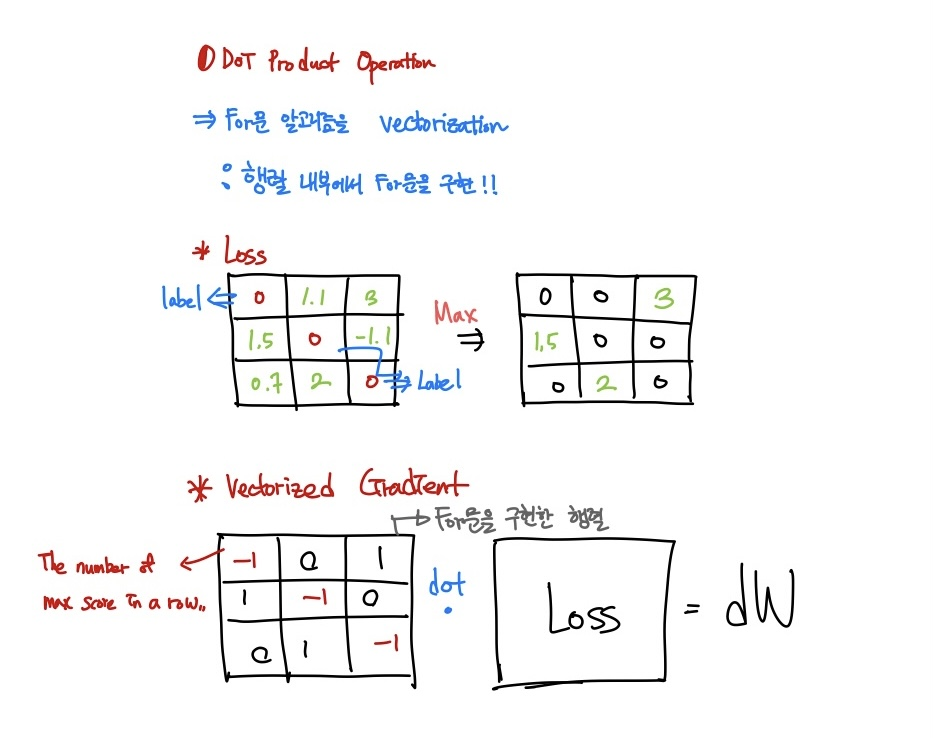


In [ ]:
def svm_loss_vectorized(W, X, y, reg):
    """
    Structured SVM loss function, vectorized implementation.

    Inputs and outputs are the same as svm_loss_naive.
    """
    loss = 0.0
    dW = np.zeros(W.shape)  # initialize the gradient as zero

    #############################################################################
    # TODO:                                                                     #
    # Implement a vectorized version of the structured SVM loss, storing the    #
    # result in loss.                                                           #
    #############################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    #############################################################################
    # TODO:                                                                     #
    # Implement a vectorized version of the gradient for the structured SVM     #
    # loss, storing the result in dW.                                           #
    #                                                                           #
    # Hint: Instead of computing the gradient from scratch, it may be easier    #
    # to reuse some of the intermediate values that you used to compute the     #
    # loss.                                                                     #
    #############################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****



    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    return loss, dW


##Softmax Loss

You could remind the notion on lecture note such that

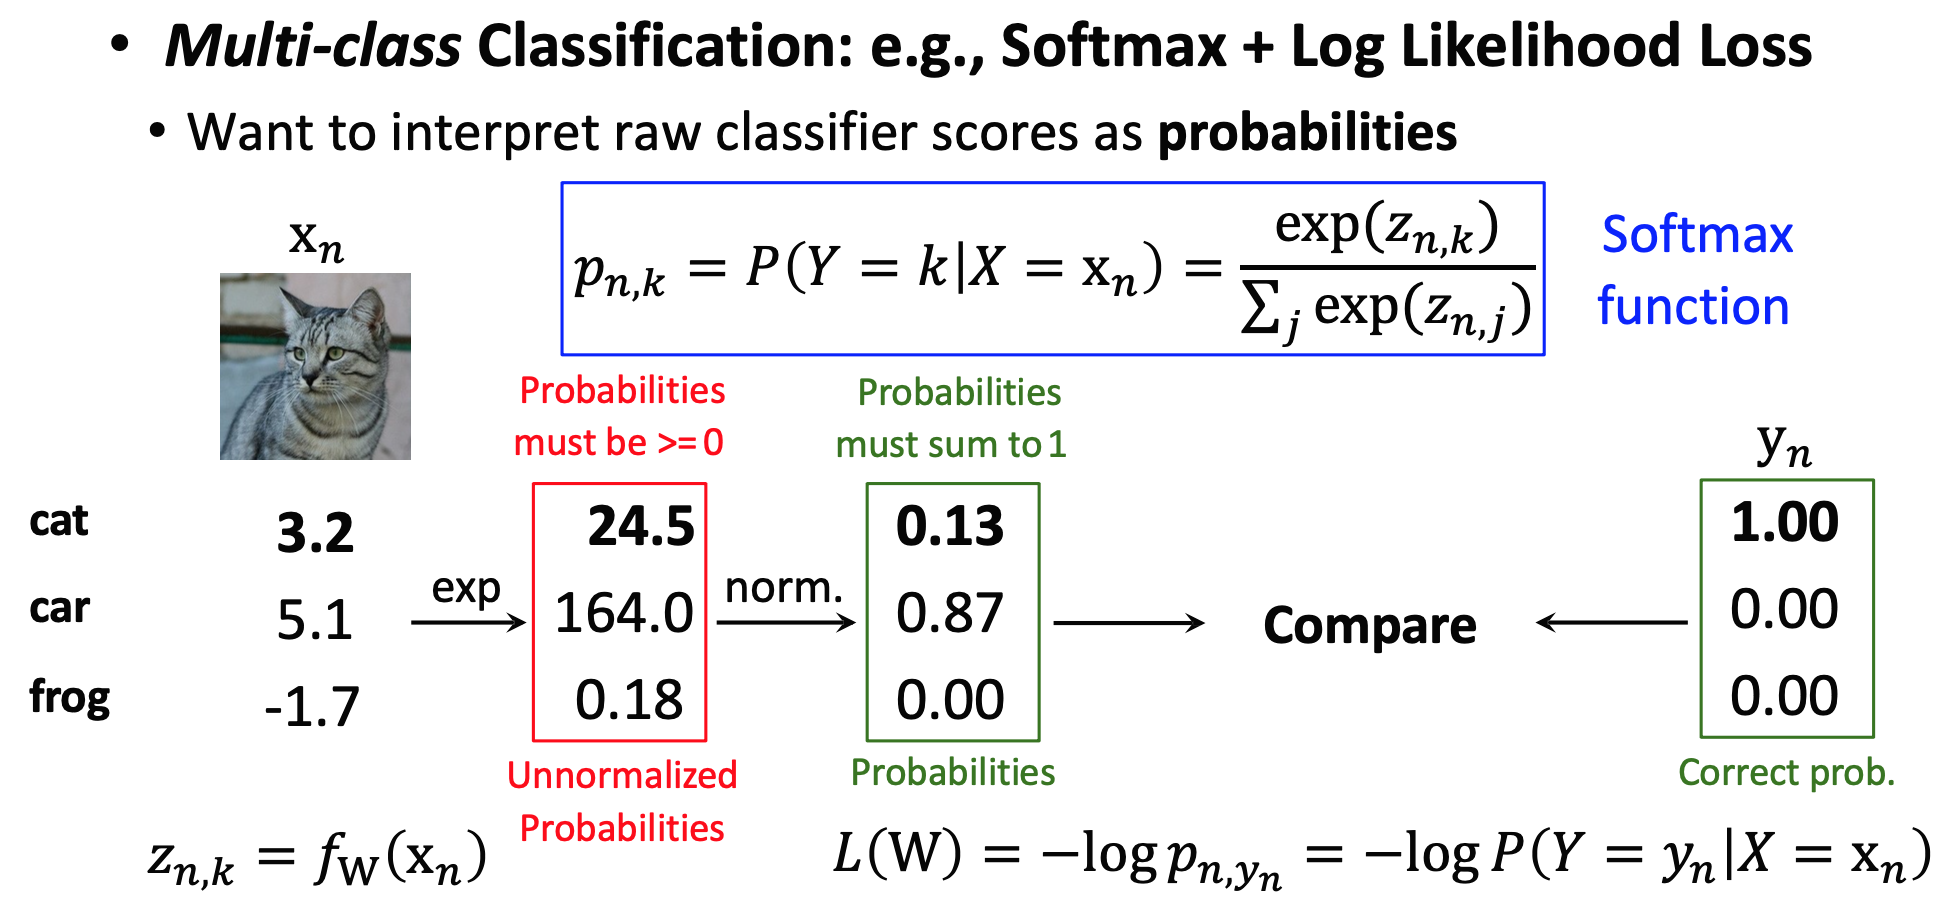

In [42]:
def softmax_loss_naive(W, X, y, reg):
    """
    Softmax loss function, naive implementation (with loops)

    Inputs have dimension D, there are C classes, and we operate on minibatches
    of N examples.

    Inputs:
    - W: A numpy array of shape (D, C) containing weights.
    - X: A numpy array of shape (N, D) containing a minibatch of data.
    - y: A numpy array of shape (N,) containing training labels; y[i] = c means
      that X[i] has label c, where 0 <= c < C.
    - reg: (float) regularization strength

    Returns a tuple of:
    - loss as single float
    - gradient with respect to weights W; an array of same shape as W
    """
    # Initialize the loss and gradient to zero.
    loss = 0.0
    dW = np.zeros_like(W)

    #############################################################################
    # TODO: Compute the softmax loss and its gradient using explicit loops.     #
    # Store the loss in loss and the gradient in dW. If you are not careful     #
    # here, it is easy to run into numeric instability. Don't forget the        #
    # regularization!                                                           #
    #############################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    return loss, dW

##Let's train our Linear Classifier Model!

If you implement all of code clearly, you can see the result like below. Here, only 1 iteration is done but you can do more and increase the accuracy, using some techniques(which we would learn later)!

Since this model is very simple, the performance is really really bad,,

###Linear Classifier **SVM**

In [56]:


learning_rates = [1e-6]
regularization_strengths = [2.5e3]

results = {}
best_val = -1
best_svm = None




for i in learning_rates:
  for j in regularization_strengths:
    svm = LinearSVM()
    svm.train(X_train, y_train, learning_rate=i, reg=j,num_iters=1700, verbose=True)
    y_train_pred=svm.predict(X_train)
    train_accuracy=np.mean(y_train.squeeze(1) == y_train_pred)
    y_val_pred=svm.predict(X_test)
    val_accuracy=np.mean(y_test.squeeze(1) == y_val_pred)
    results[(i,j)]=train_accuracy, val_accuracy
    if val_accuracy > best_val:
      best_val=val_accuracy
      best_svm=svm


# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))

print('best validation accuracy achieved: %f' % best_val)

iteration 0 / 1700: loss 86.904484
iteration 100 / 1700: loss 37.560677
iteration 200 / 1700: loss 19.480276
iteration 300 / 1700: loss 12.836508
iteration 400 / 1700: loss 10.386818
iteration 500 / 1700: loss 9.519347
iteration 600 / 1700: loss 9.181279
iteration 700 / 1700: loss 9.045943
iteration 800 / 1700: loss 9.011041
iteration 900 / 1700: loss 8.987974
iteration 1000 / 1700: loss 8.987704
iteration 1100 / 1700: loss 8.985829
iteration 1200 / 1700: loss 8.983720
iteration 1300 / 1700: loss 8.990769
iteration 1400 / 1700: loss 8.995717
iteration 1500 / 1700: loss 8.992632
iteration 1600 / 1700: loss 8.979551
lr 1.000000e-06 reg 2.500000e+03 train accuracy: 0.100000 val accuracy: 0.100000
best validation accuracy achieved: 0.100000


###Linear Classifier **Softmax**

In [55]:

learning_rates = [1e-6]
regularization_strengths = [2.5e3]

results = {}
best_val = -1
best_svm = None




for i in learning_rates:
  for j in regularization_strengths:
    softmax = Softmax()
    softmax.train(X_train, y_train, learning_rate=i, reg=j,num_iters=1700, verbose=True)
    y_train_pred=softmax.predict(X_train)
    train_accuracy=np.mean(y_train.squeeze(1) == y_train_pred)
    y_val_pred=softmax.predict(X_test)
    val_accuracy=np.mean(y_test.squeeze(1) == y_val_pred)
    results[(i,j)]=train_accuracy, val_accuracy
    if val_accuracy > best_val:
      best_val=val_accuracy
      best_svm=svm


# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))

print('best validation accuracy achieved: %f' % best_val)

iteration 0 / 1700: loss 79.070739
iteration 100 / 1700: loss 30.471109
iteration 200 / 1700: loss 12.639181
iteration 300 / 1700: loss 6.095856
iteration 400 / 1700: loss 3.694197
iteration 500 / 1700: loss 2.813409
iteration 600 / 1700: loss 2.489932
iteration 700 / 1700: loss 2.371322
iteration 800 / 1700: loss 2.327702
iteration 900 / 1700: loss 2.311690
iteration 1000 / 1700: loss 2.305835
iteration 1100 / 1700: loss 2.303675
iteration 1200 / 1700: loss 2.302817
iteration 1300 / 1700: loss 2.302666
iteration 1400 / 1700: loss 2.302409
iteration 1500 / 1700: loss 2.302343
iteration 1600 / 1700: loss 2.302489
lr 1.000000e-06 reg 2.500000e+03 train accuracy: 0.100000 val accuracy: 0.100000
best validation accuracy achieved: 0.100000


##SGD

This optimizer would be easily implemented compared to previous things :)



In [ ]:
#Implement Vanilla Stochastic Gradient Descent
#Actually, this model is quite simple so that it doesn't need any verification. It's very intuitive itself.

def sgd(w, dw, config=None):
   """
    Performs vanilla stochastic gradient descent.

    Inputs:
    - w: A numpy array of weights.
    - dw: A numpy array of a minibatch of derivatives.
    - config: config format -> learning_rate: Scalar learning rate.


    Returns a tuple of:
    - w: A numpy array of updated weights
    - config: same with input
    """
    if config is None:
        config = {}
    config.setdefault("learning_rate", 1e-2)

    #############################################################################
    # TODO: Compute the Gradient Descent.                                       #
    #############################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****



    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    return w, config